# Particle movement in a simple model of a tokamak

In [1]:
from plasmapy import simulation
from plasmapy.classes.sources import Coils
import astropy.units as u
import numpy as np
radius = 0.5 * u.m
minor_radius = 0.3 * u.m
main_current = 4 * u.kA
n_coils = 8
currents = n_coils * [4 * u.kA]
coils = Coils.toykamak(minor_radius, radius, main_current, currents)

In [13]:
N = 10
x = u.Quantity(np.zeros((N, 3)),  u.m)
x[:,0] = 0.6 * u.m
v = u.Quantity(np.zeros((N, 3)), u.m / u.s)
v[:,1] = 300 * u.m / u.s
np.random.seed(0)
v[:,[0, 2]] = np.random.normal(scale=1000, size=(N, 2)) * u.m / u.s

simulation_multiple = simulation.ParticleTracker(coils, x, v, 'p').run(1e-2 * u.s, 1e-5 * u.s)

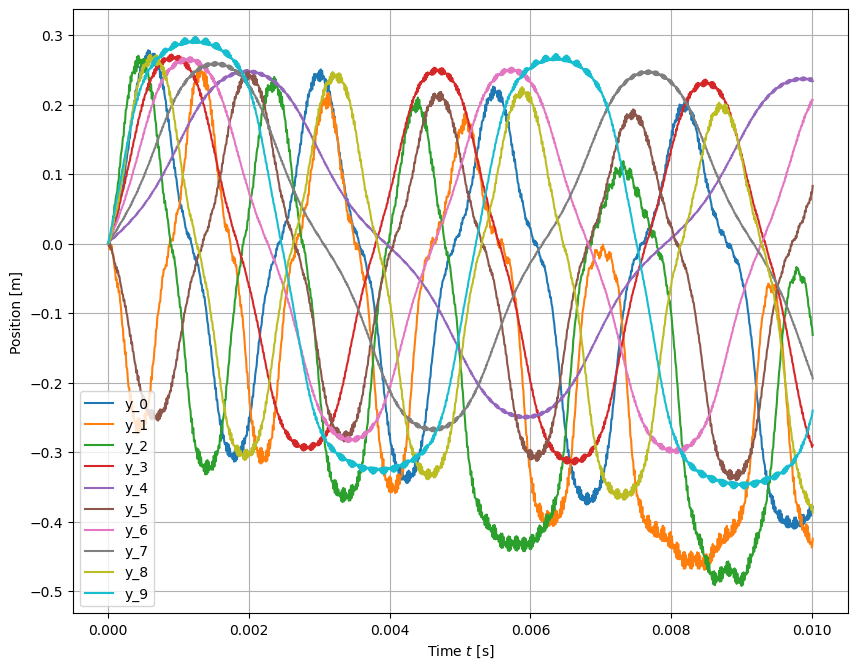

In [16]:
simulation_multiple.particletracker.plot_time_trajectories('y')

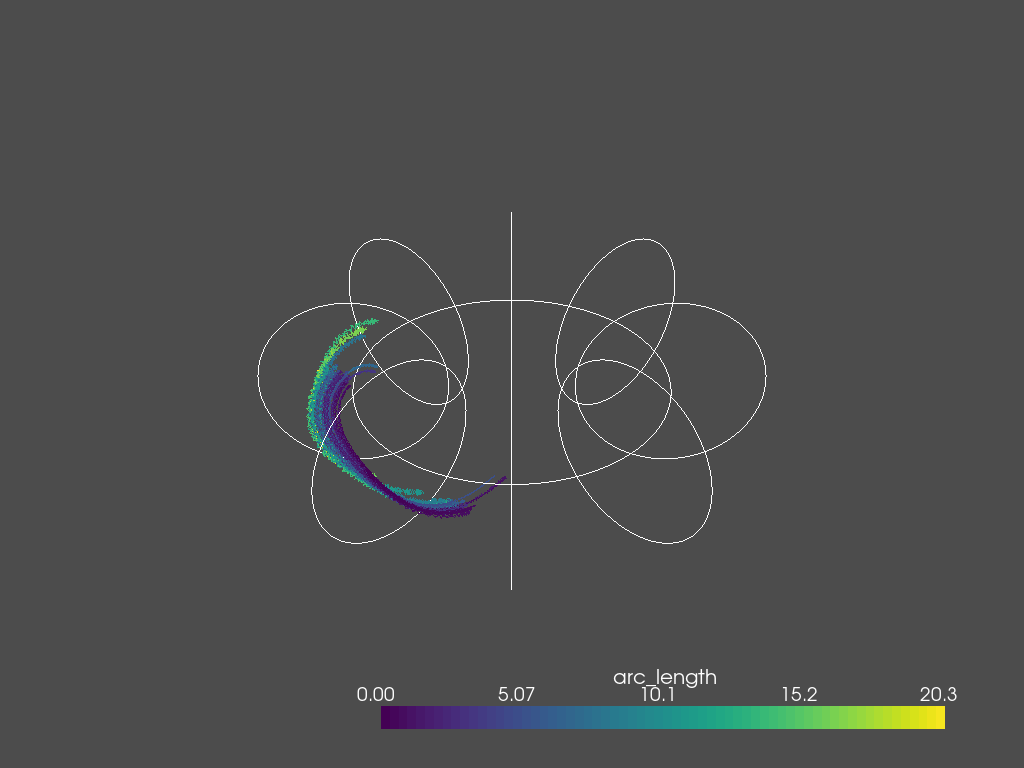

In [17]:
simulation_multiple.particletracker.visualize(particles=range(N), plasma=coils).show()

We can also animate this:

In [ ]:
simulation_multiple.particletracker.animate("toykamak_electron.mp4", particles=range(N), nframes = 1000, notebook_display = True, plasma=coils)

Trajectory plotting takes a good while, so instead we can skip plotting the splines and simply use a colored point cloud by using `plot_trajectories = False`:

In [ ]:
simulation_multiple.particletracker.animate("toykamak_electron.mp4", particles=range(N), nframes = 1000, notebook_display = True, plasma=coils, plot_trajectories = False)

We can stick a few more particles in there, throw them around more randomly and hope get a view of field lines in the to*y*kamak:

In [ ]:
N = 30
x = u.Quantity(np.zeros((N, 3)),  u.m)
x[:,0] = 0.6 * u.m
np.random.seed(0)
x += np.random.normal(scale=0.1, size=(N, 3)) * u.m
v = u.Quantity(np.zeros((N, 3)), u.m / u.s)
v[:,1] = 300 * u.m / u.s
v[:,[0, 2]] = np.random.normal(scale=1000, size=(N, 2)) * u.m / u.s

simulation_tracing = simulation.ParticleTracker(c, x, v, 'p').run(1e-2 * u.s, 1e-5 * u.s)

In [ ]:
simulation_tracing.particletracker.animate("toykamak_tracing.mp4", particles=range(N), nframes = 1000, notebook_display = True, plasma=c, plot_arrows = False)